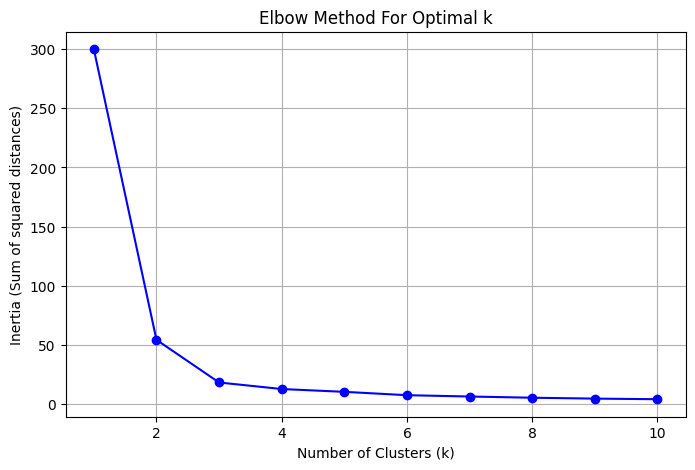

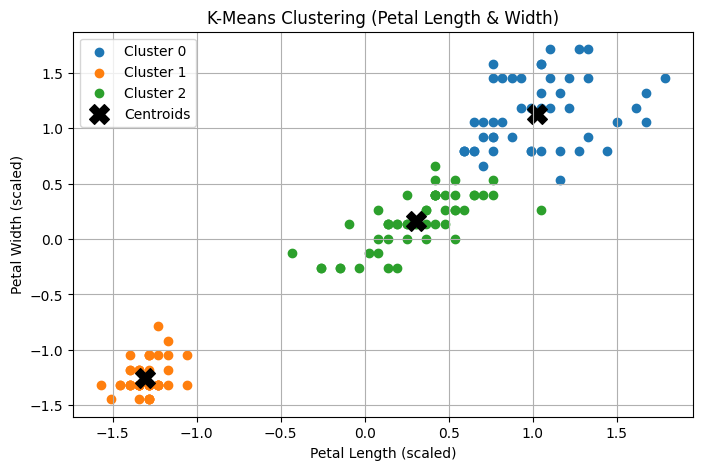

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("iris.csv")

# Use only petal length and petal width
X = df[['petal_length', 'petal_width']]

# Optional: Feature Scaling (recommended for distance-based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find optimal k
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of squared distances)")
plt.grid(True)
plt.show()

# After observing the elbow plot, you can pick optimal k, e.g., k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame for visualization
df['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(8, 5))
for i in range(optimal_k):
    plt.scatter(
        X_scaled[clusters == i, 0],
        X_scaled[clusters == i, 1],
        label=f'Cluster {i}'
    )

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200, c='black', marker='X', label='Centroids'
)
plt.title("K-Means Clustering (Petal Length & Width)")
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.legend()
plt.grid(True)
plt.show()
